In [2]:
# Data manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preferences
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [5]:
# Read in the raw data
raw_data = pd.read_excel('Simulated Caregiving - Easy v Demanding.xlsx', sheet_name=None)
data = raw_data.copy()

# Merge all the sheets into a single dataframe and add sheet name as the "sessionæ variable
all_data = pd.DataFrame()
for k in data.keys():
    temp_df = data.get(k)
    temp_df['session'] = k
    all_data = pd.concat([all_data, temp_df])

# Relabel the cols for easier handling
all_data.columns = ['items', 'condition', 'interval_number', 'percent_interval_w_care', 'session']
    
# Reorganize the cols logically
all_data = all_data[[
    'session', 'items', 'condition', 'interval_number', 'percent_interval_w_care'
]].reset_index(drop=True)

all_data

,session,items,condition,interval_number,percent_interval_w_care
0,SP2018-1,Yes,Easy,1,95
1,SP2018-1,Yes,Easy,2,5
2,SP2018-1,Yes,Easy,3,85
3,SP2018-1,Yes,Easy,4,20
4,SP2018-1,Yes,Easy,5,70
5,SP2018-1,Yes,Easy,6,35
6,SP2018-1,Yes,Demanding,7,35
7,SP2018-1,Yes,Demanding,8,30
8,SP2018-1,Yes,Demanding,9,15
9,SP2018-1,Yes,Demanding,10,30


In [6]:
# Question for David: Was this step necessary after I took out the concurrent dataset???? 

# Merge the easy and demanding cols into the percent_interval_w_care col

# Modify missing vals so we can do the math
all_data = all_data.fillna(-1)

new_vals = []
for i in range(len(all_data)):
    percent = all_data['percent_interval_w_care'][i]
    if percent==-1:
        percent = all_data['percent_interval_w_care_easy'][i] + all_data['percent_interval_w_care_demanding'][i]
        if (all_data['percent_interval_w_care_easy'][i]<0) | (all_data['percent_interval_w_care_demanding'][i]<0):
            percent+=1
        new_vals.append(percent)
    else:
        new_vals.append(percent)
all_data['percent_interval_w_care'] = new_vals

# Return missing vals to missing
all_data = all_data.replace(-1, np.nan)

# Take a peek
all_data

,session,items,condition,interval_number,percent_interval_w_care
0,SP2018-1,Yes,Easy,1,95
1,SP2018-1,Yes,Easy,2,5
2,SP2018-1,Yes,Easy,3,85
3,SP2018-1,Yes,Easy,4,20
4,SP2018-1,Yes,Easy,5,70
5,SP2018-1,Yes,Easy,6,35
6,SP2018-1,Yes,Demanding,7,35
7,SP2018-1,Yes,Demanding,8,30
8,SP2018-1,Yes,Demanding,9,15
9,SP2018-1,Yes,Demanding,10,30


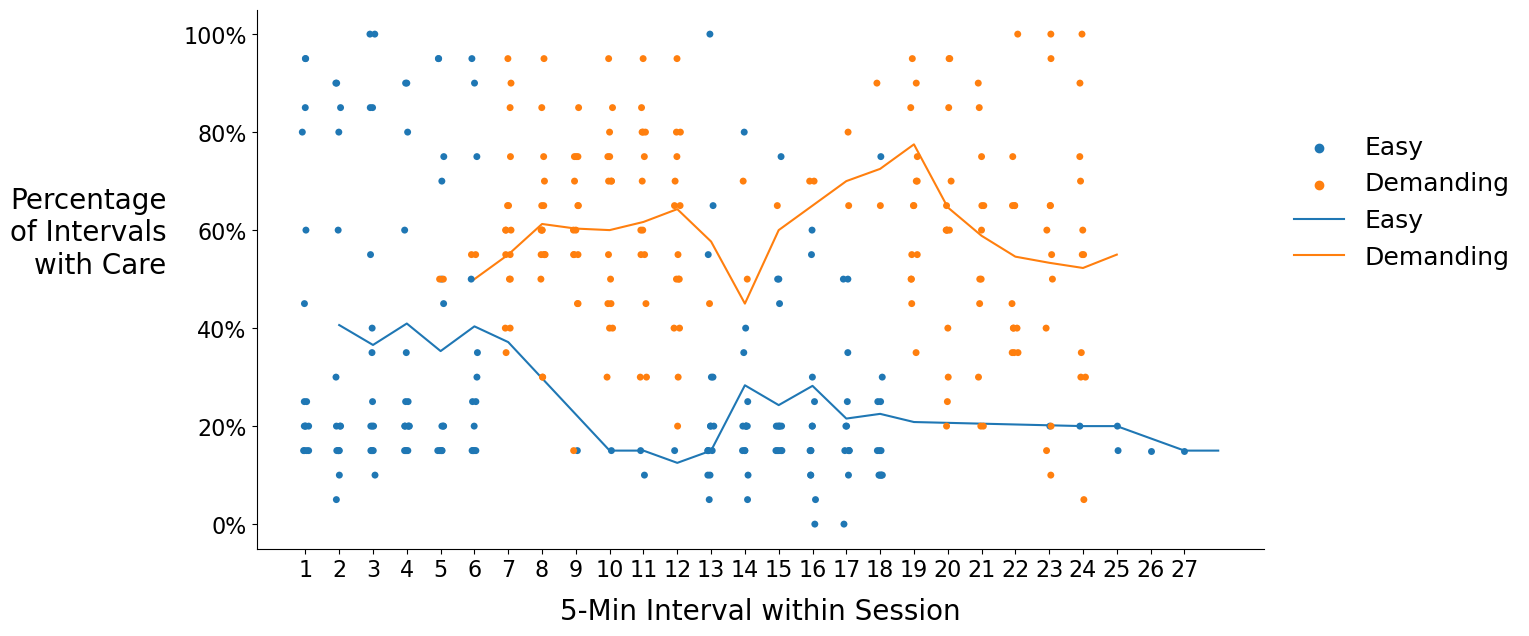

In [7]:
#Simple plot for easy vs demanding - copied from David's repository

sns.color_palette("viridis")
fig, ax = plt.subplots(figsize=(13, 7))
sns.stripplot(
    x='interval_number', 
    y='percent_interval_w_care', 
    data=all_data.sort_values(by=['condition'], ascending=False), 
    hue='condition', 
)
grouped_data = all_data[['condition', 'interval_number', 'percent_interval_w_care']].\
                groupby(['condition', 'interval_number'])['percent_interval_w_care'].mean().\
                reset_index().sort_values(by='condition', ascending=False).reset_index(drop=True)
sns.lineplot(
    x='interval_number', 
    y='percent_interval_w_care', 
    data=grouped_data, 
    hue='condition', 
)
plt.ylabel("Percentage\nof Intervals\nwith Care", fontsize=20, rotation=0, ha="right", labelpad=12)
ticks = range(0, 101, 20)
labels = [str(tick)+"%" for tick in ticks]
plt.yticks(ticks=ticks, labels=labels, fontsize=16)
plt.xlabel("5-Min Interval within Session", fontsize=20, labelpad=12)
plt.xticks(fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc=(1.02, 0.5), frameon=False, fontsize=18)
plt.show()

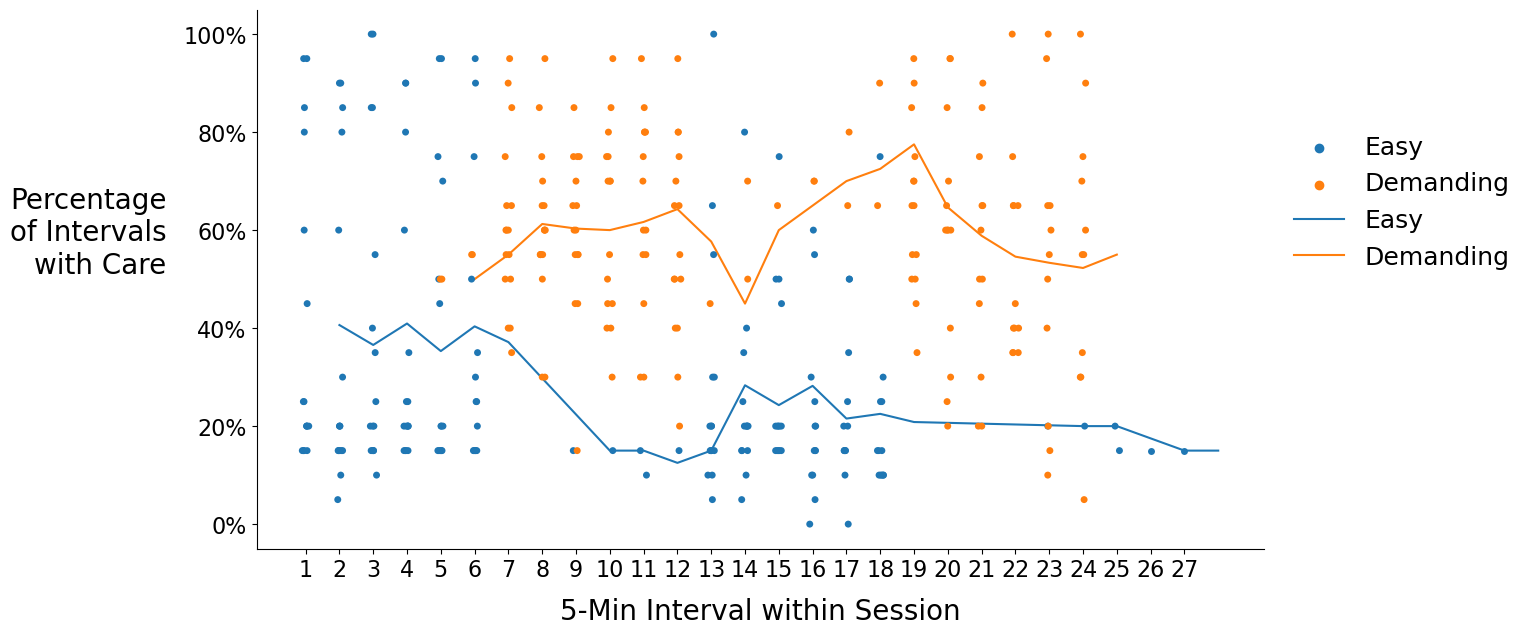

In [8]:
# trying cividis scale just to see what that looks like
# I don't really notice a difference? 

sns.color_palette("cividis")
fig, ax = plt.subplots(figsize=(13, 7))
sns.stripplot(
    x='interval_number', 
    y='percent_interval_w_care', 
    data=all_data.sort_values(by=['condition'], ascending=False), 
    hue='condition', 
)
grouped_data = all_data[['condition', 'interval_number', 'percent_interval_w_care']].\
                groupby(['condition', 'interval_number'])['percent_interval_w_care'].mean().\
                reset_index().sort_values(by='condition', ascending=False).reset_index(drop=True)
sns.lineplot(
    x='interval_number', 
    y='percent_interval_w_care', 
    data=grouped_data, 
    hue='condition', 
)
plt.ylabel("Percentage\nof Intervals\nwith Care", fontsize=20, rotation=0, ha="right", labelpad=12)
ticks = range(0, 101, 20)
labels = [str(tick)+"%" for tick in ticks]
plt.yticks(ticks=ticks, labels=labels, fontsize=16)
plt.xlabel("5-Min Interval within Session", fontsize=20, labelpad=12)
plt.xticks(fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc=(1.02, 0.5), frameon=False, fontsize=18)
plt.show()

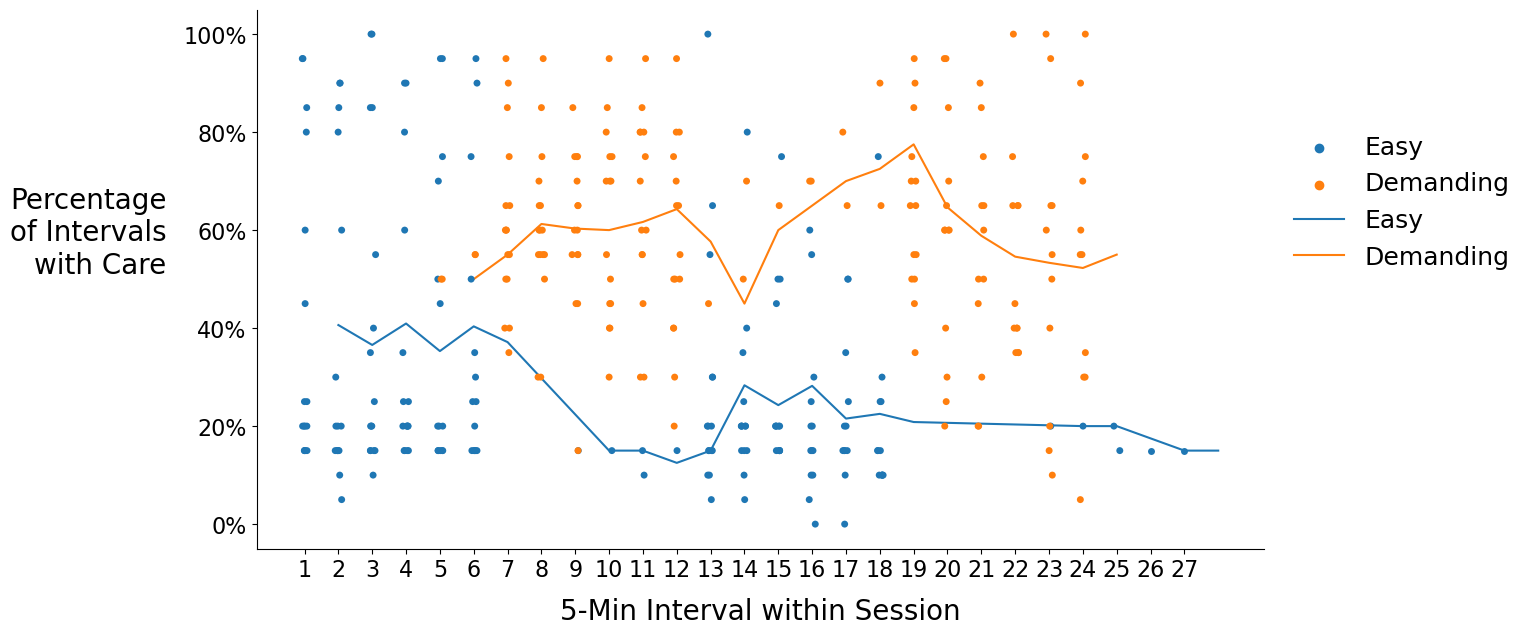

In [13]:
# trying grey scale just to see what that looks like - - - - wtf. 
# I tried a few things from here: https://matplotlib.org/stable/tutorials/colors/colormaps.html and couldn't figure it out.

sns.color_palette("gist_gray")
fig, ax = plt.subplots(figsize=(13, 7))
sns.stripplot(
    x='interval_number', 
    y='percent_interval_w_care', 
    data=all_data.sort_values(by=['condition'], ascending=False), 
    hue='condition', 
)
grouped_data = all_data[['condition', 'interval_number', 'percent_interval_w_care']].\
                groupby(['condition', 'interval_number'])['percent_interval_w_care'].mean().\
                reset_index().sort_values(by='condition', ascending=False).reset_index(drop=True)
sns.lineplot(
    x='interval_number', 
    y='percent_interval_w_care', 
    data=grouped_data, 
    hue='condition', 
)
plt.ylabel("Percentage\nof Intervals\nwith Care", fontsize=20, rotation=0, ha="right", labelpad=12)
ticks = range(0, 101, 20)
labels = [str(tick)+"%" for tick in ticks]
plt.yticks(ticks=ticks, labels=labels, fontsize=16)
plt.xlabel("5-Min Interval within Session", fontsize=20, labelpad=12)
plt.xticks(fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc=(1.02, 0.5), frameon=False, fontsize=18)
plt.show()

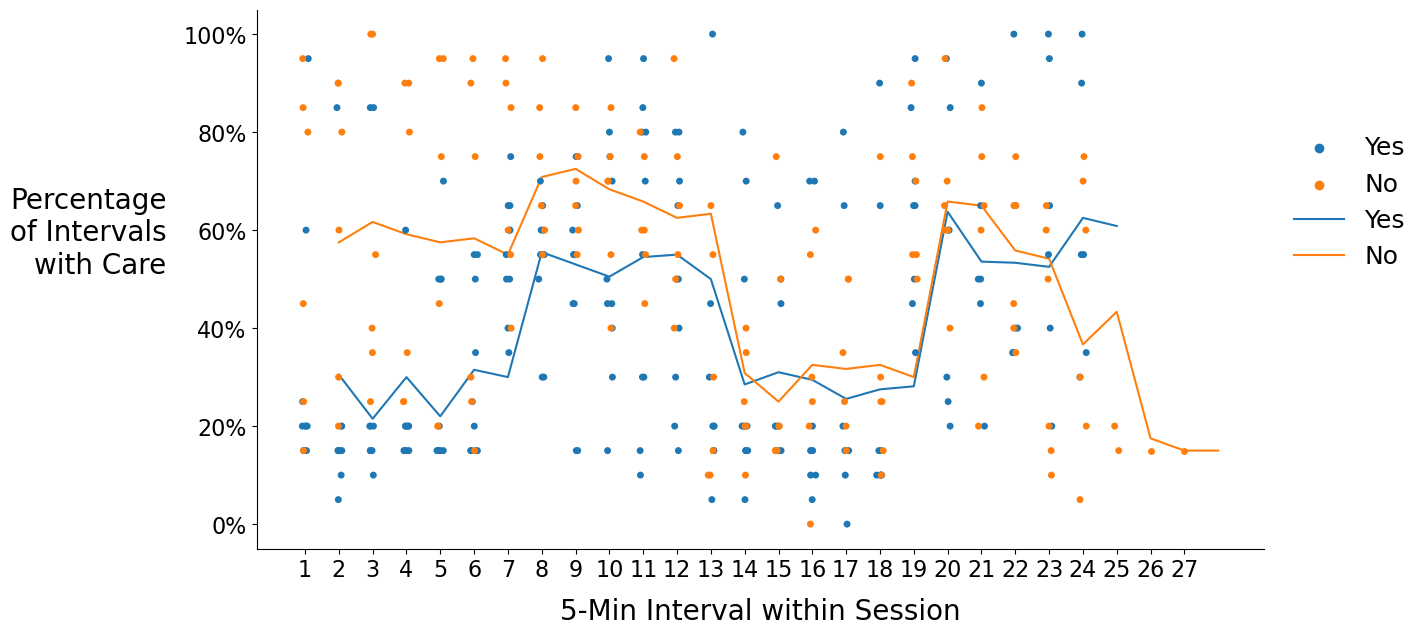

In [21]:
# how do I plot just the data with preferred items and then also just the data without preferred items? 

# I first tried adding 'items' in before 'condition' wherever it appeared. 
# I got an error message about position and keywords.
# I then replaced 'condition' with items ... 
# this doesn't show me the mean by conditions - easy vs demanding - for the data with preferred items vs with no
# hm.

sns.color_palette("gist_gray")
fig, ax = plt.subplots(figsize=(13, 7))
sns.stripplot(
    x='interval_number', 
    y='percent_interval_w_care', 
    data=all_data.sort_values(by=['items'], ascending=False), 
    hue='items', 
)
grouped_data = all_data[['items', 'interval_number', 'percent_interval_w_care']].\
                groupby(['items', 'interval_number'])['percent_interval_w_care'].mean().\
                reset_index().sort_values(by='items', ascending=False).reset_index(drop=True)
sns.lineplot(
    x='interval_number', 
    y='percent_interval_w_care', 
    data=grouped_data, 
    hue='items', 
)
plt.ylabel("Percentage\nof Intervals\nwith Care", fontsize=20, rotation=0, ha="right", labelpad=12)
ticks = range(0, 101, 20)
labels = [str(tick)+"%" for tick in ticks]
plt.yticks(ticks=ticks, labels=labels, fontsize=16)
plt.xlabel("5-Min Interval within Session", fontsize=20, labelpad=12)
plt.xticks(fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc=(1.02, 0.5), frameon=False, fontsize=18)
plt.show()

In [ ]:
# to be continued... 
